### Нежное введение в ту часть машинного обучения
#### задачи из которой решает sklearn
* Supervised learning: classification/regression
* Unsupervised learning (for structure discovery and visualization): clustering, dimensionality reduction, etc.

#### Задачи, которые обычно относят к машинному обучению -- в одной куче (wiki):
* **Classification **
* **Clustering **
* **Regression **
* Anomaly detection 
* Association rules 
* Reinforcement learning 
* Structured prediction 
* **Feature engineering **
* Feature learning 
* Online learning 
* **Semi-supervised learning** 
* **Unsupervised learning** 
* Learning to rank 
* Grammar induction

Настоятельно рекомендую ознакомиться:
https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/home/week/7
А лучше вообще пройти весь курс.

Нужно понять
1. какую задачу мы решаем;
2. как мы будем оценивать свои успехи (может, нам вовсе и не нужен машин лёрнинг?);
3. какими данными мы располагаем;
4. как именно по данным будем строить фичи (+ фичи на основе фич);
5. как отмасштабировать-отфильтровать данные, если в них есть мусор;
6. с каких моделей стоит начать;
7. как оценивать качество модели (в т.ч. случайно ли выбирать holdout).

## sklearn classification tutorial 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [8]:
print(type(digits))
print(type(digits.data))
print(type(digits.target))
digits.data

<class 'sklearn.datasets.base.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [9]:
print(digits.data.shape)
print(digits.target.shape)
digits.target

(1797, 64)
(1797,)


array([0, 1, 2, ..., 8, 9, 8])

(1797, 8, 8)


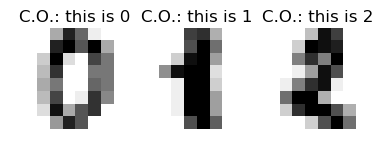

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

print(digits.images.shape)

images_and_predictions = list(zip(digits.images[:3], digits.target[:3]))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('C.O.: this is %i' % prediction)

plt.show()

In [30]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
cutoff = 4
clf.fit(digits.data[:-cutoff], digits.target[:-cutoff])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predicted: [0 8 9 8]
True:      [0 8 9 8]


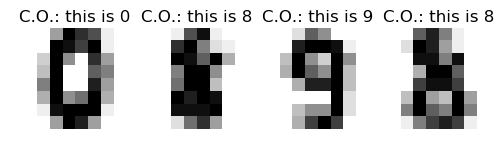

In [33]:
# предсказываем на том, что мы никогда не видели
predicted_digits = clf.predict(digits.data[-cutoff:])

print("Predicted:", predicted_digits)
print("True:     ", digits.target[-cutoff:])

images_and_predictions = list(zip(digits.images[-cutoff:], predicted_digits))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('C.O.: this is %i' % prediction)

plt.show()

Но это всё игрушки, мы проверили на нескольких примерах, однако это не убеждает, что алгоритм хорош.

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Насколько часто он ошибается на обучающем множестве? 
# (ВНИМАНИЕ! это не прямая оценка качества алгоритма, это демонстрация того, 
# насколько сильно он "подогнан" к данным).
print(accuracy_score(digits.target, clf.predict(digits.data)))

# Правильный путь -- обучиться на части данных, на другой части проверить.
# Способ и отношения разбиения на обучающую и тестовую выборки зависят от задачи и размера данных.

# Чем меньше test, тем, как правило, лучше обучаемся, но меньше доверия к оценке.
# Чем меньше train, тем хуже обучаемся, но точнее оцениваем.

# Часто -- train/test как 7:3, 4:1

n_total = digits.data.shape[0]
split_ratio = 0.8
n_train = int(n_total * split_ratio)

X_train = digits.data[:n_train]
y_train = digits.target[:n_train]

clf.fit(X_train, y_train)

X_test = digits.data[n_train:]
y_test = digits.target[n_train:]

print("Accuracy on test set:", accuracy_score(y_test, clf.predict(X_test)))

0.991652754591
Accuracy on test set: 0.963888888889


In [40]:
# Ещё один замечательный способ оценки -- кросс-валидация.
# Сравниваем оценки для разных разбиений. 
# Да хоть сейчас (хотя ситуация, когда |train| > |test| -- не очень здоровая).

clf.fit(X_train, y_train)
print("Accuracy on X_test after training on X_train:", accuracy_score(y_test, clf.predict(X_test)))

clf.fit(X_test, y_test)
print("Accuracy on X_train after training on X_test:", accuracy_score(y_train, clf.predict(X_train)))

# Какие выводы? Не очень сложная для SVM задача, не очень плохая точность :) Но не более того.
# Есть удобный механизм для k-fold кросс-валидации -- она почестнее 
# для усреднения оценок качества, и можно сохранить разумное соотношение размеров обучения и теста.
# Делим данные на k частей, на всех, кроме одной, обучается, на ней тестируем. Всё просто.
# 
# KFold используется в домашке, всё равно предстоит так или иначе разобраться с ним : )

Accuracy on X_test after training on X_train: 0.963888888889
Accuracy on X_train after training on X_test: 0.939457202505


In [42]:
# Есть небольшая проблема -- классов у нас несколько, и accuracy нам никогда не скажет, какой именно
# предсказывается плохо или хорошо, а на практике это, как правило, очень важно.

# Есть оценки качества для отдельных классов. Точность, полнота, f-score, вот это всё.
# Искать подходящую вам -- здесь http://scikit-learn.org/stable/modules/model_evaluation.html

# А мы построим стандартный отчёт о качестве классификации, которого для простых задач обычно хватает.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        35
          1       0.97      1.00      0.99        36
          2       1.00      1.00      1.00        35
          3       1.00      0.84      0.91        37
          4       0.97      0.92      0.94        37
          5       0.93      1.00      0.96        37
          6       1.00      1.00      1.00        37
          7       1.00      1.00      1.00        36
          8       0.86      0.97      0.91        33
          9       0.92      0.95      0.93        37

avg / total       0.97      0.96      0.96       360



In [53]:
"""
 Самостоятельная работа.
 
 https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0
 
 Исследовать классический датасет. 
 
 - Что за фичи? Как распределены из значения?
 
 - Сколько классов? Хорошо ли они сбалансированы?
 
 - Проверить несколько известных вам моделей для классификации методом отложенной выборки; 
   accuracy, точность, полнота, f-мера. 
   Рекомендуется попробовать как минимум KNN, LogisticRegression, DecisionTree.
   
 - Попробуйте применить какую-нибудь линейную модель для классификации. 
   Нормализуйте фичи с помощью StandardScaler или как предложено ниже.
   Снова примените линейную модель. Есть выгода?
 
 - Поменять их параметры руками; как меняется качество? есть идеи, почему?
 
 - Выбрать любимую модель, подобрать её параметры с помощью GridSearchCV (см. примеры в большом ДЗ)
"""

import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()

print(iris.data.shape, iris.target.shape)

# hint
unique, counts = np.unique(iris.target, return_counts=True)

# hint
X_scaled = preprocessing.scale(iris.data)

# что это значит?
np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0)

(150, 4) (150,)


(array([ -1.69031455e-15,  -1.63702385e-15,  -1.48251781e-15,
         -1.62314606e-15]), array([ 1.,  1.,  1.,  1.]))